In [2]:
from connect import connectionCreator
from cursor_utils import select_operation

cnx = connectionCreator()
cursor = cnx.cursor()

# Like in the other operations, first directly execute SELECT query
query = """SELECT * FROM life_expectancy_announcement"""
cursor.execute(query)
data = cursor.fetchall()

Connection established with the database


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os.path import join

query = '''

SELECT S.country, MAX(S.longevity) as Longevity, MAX(D.deaths_averted) as Deaths_averted FROM life_expectancy_announcement S
LEFT OUTER JOIN art_treatment_announcement D ON (S.country = D.country and S.date = D.date)
group by S.country
HAVING Deaths_Averted is not Null;
'''

mydb = connectionCreator()

df = pd.read_sql(query,mydb)



Connection established with the database


C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\2125040464.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query,mydb)


Connection established with the database


C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\3309209626.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reported_hiv_prevelance = pd.read_sql_query("SELECT * FROM reported_hiv_prevelance", mydb)


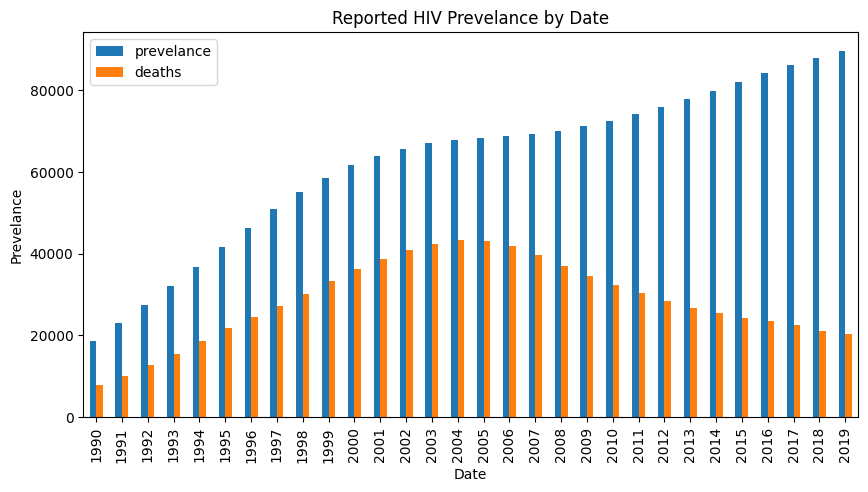

In [4]:
# Let's create dataframes for each data.

mydb = connectionCreator()

reported_hiv_prevelance = pd.read_sql_query("SELECT * FROM reported_hiv_prevelance", mydb)


# Let's use different data visualization methods to explore the data.

# First, let's see the distribution of the data by date.
reported_hiv_prevelance.groupby("date").mean("prevelance").plot(kind="bar", figsize=(10, 5))
plt.title("Reported HIV Prevelance by Date")
plt.xlabel("Date")
plt.ylabel("Prevelance")
plt.savefig("graph1")
plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1217640793.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, mydb)


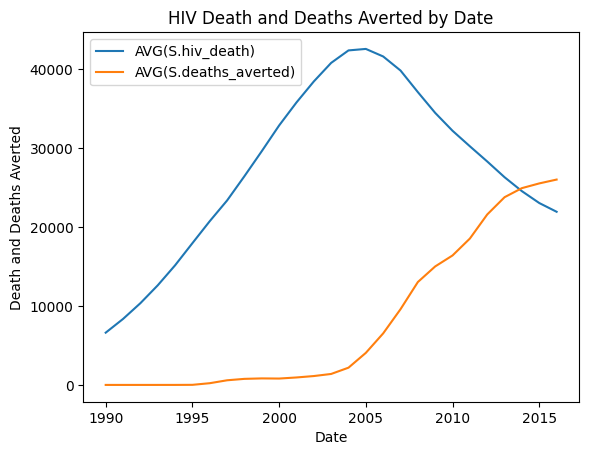

In [6]:
query = """
SELECT S.date, AVG(S.hiv_death), AVG(S.deaths_averted)
FROM art_treatment_announcement S 
group by S.date;"""

df = pd.read_sql_query(query, mydb)
df.plot(x="date", y=["AVG(S.hiv_death)", "AVG(S.deaths_averted)"], kind="line")
plt.title("HIV Death and Deaths Averted by Date")
plt.xlabel("Date")
plt.ylabel("Death and Deaths Averted")
plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1824623226.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


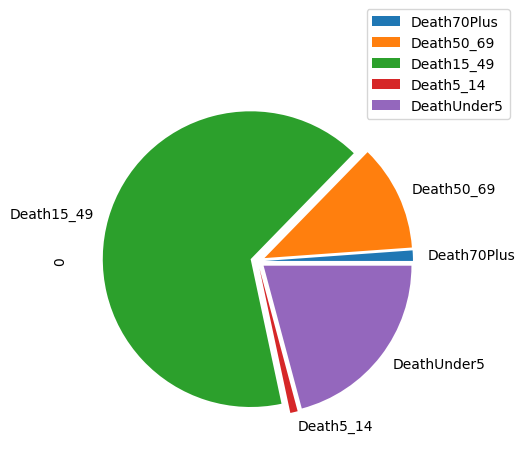

In [30]:
# Let's see the distribution of a view data by date using pie chart.

query = """
SELECT SUM(S.death_70plus)/ SUM(D.deaths) as Death70Plus  , sum(S.death_50_69) / SUM(D.deaths) as Death50_69 , sum(S.death_15_49) / SUM(D.deaths) as Death15_49, 
SUM(S.death_5_14) / SUM(D.deaths) as Death5_14, SUM(S.death_under5) / SUM(D.deaths) as DeathUnder5 
FROM reported_hiv_deaths S 
LEFT OUTER JOIN reported_hiv_prevelance D  ON (S.country = D.country and S.date = D.date) 
GROUP BY S.date
HAVING S.date = 1990;
"""

df = pd.read_sql_query(query, cnx)
# transpose the df
myExplode = [0.05,0.05,0.05,0.05,0.05]
df = df.transpose()
df.plot.pie(subplots=True, explode = myExplode)
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1496542479.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


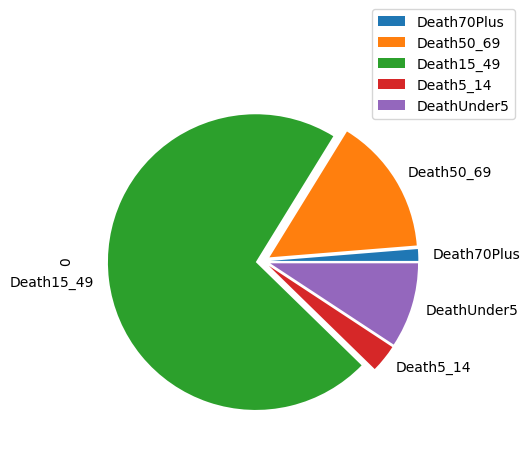

In [29]:
# Let's see the distribution of a view data by date using pie chart.

query = """
SELECT SUM(S.death_70plus)/ SUM(D.deaths) as Death70Plus  , sum(S.death_50_69) / SUM(D.deaths) as Death50_69 , sum(S.death_15_49) / SUM(D.deaths) as Death15_49, 
SUM(S.death_5_14) / SUM(D.deaths) as Death5_14, SUM(S.death_under5) / SUM(D.deaths) as DeathUnder5 
FROM reported_hiv_deaths S 
LEFT OUTER JOIN reported_hiv_prevelance D  ON (S.country = D.country and S.date = D.date) 
GROUP BY S.date
HAVING S.date = 2010;
"""

df = pd.read_sql_query(query, cnx)
# transpose the df
myExplode = [0.05,0.05,0.05,0.05,0.05]
df = df.transpose()
df.plot.pie(subplots=True, explode = myExplode)
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\3466863911.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


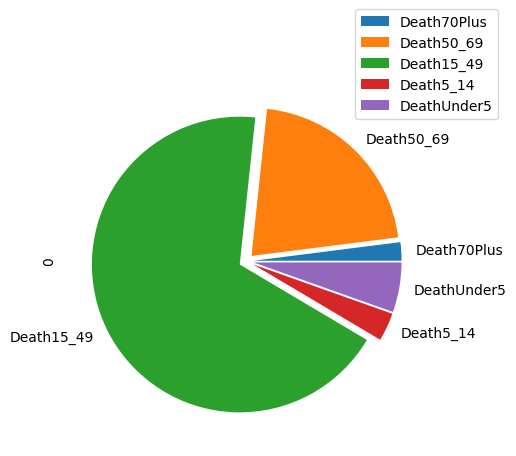

In [28]:
# Let's see the distribution of a view data by date using pie chart.

query = """
SELECT SUM(S.death_70plus)/ SUM(D.deaths) as Death70Plus  , sum(S.death_50_69) / SUM(D.deaths) as Death50_69 , sum(S.death_15_49) / SUM(D.deaths) as Death15_49, 
SUM(S.death_5_14) / SUM(D.deaths) as Death5_14, SUM(S.death_under5) / SUM(D.deaths) as DeathUnder5 
FROM reported_hiv_deaths S 
LEFT OUTER JOIN reported_hiv_prevelance D  ON (S.country = D.country and S.date = D.date) 
GROUP BY S.date
HAVING S.date = 2019;
"""

df = pd.read_sql_query(query, cnx)
# transpose the df
myExplode = [0.05,0.05,0.05,0.05,0.05]
df = df.transpose()
df.plot.pie(subplots=True, explode = myExplode)
plt.legend(bbox_to_anchor=(1.2, 1.2))
plt.show()

In [10]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.name !="Antarctica")]
world


C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\4071588466.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1056217390.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)
C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1056217390.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


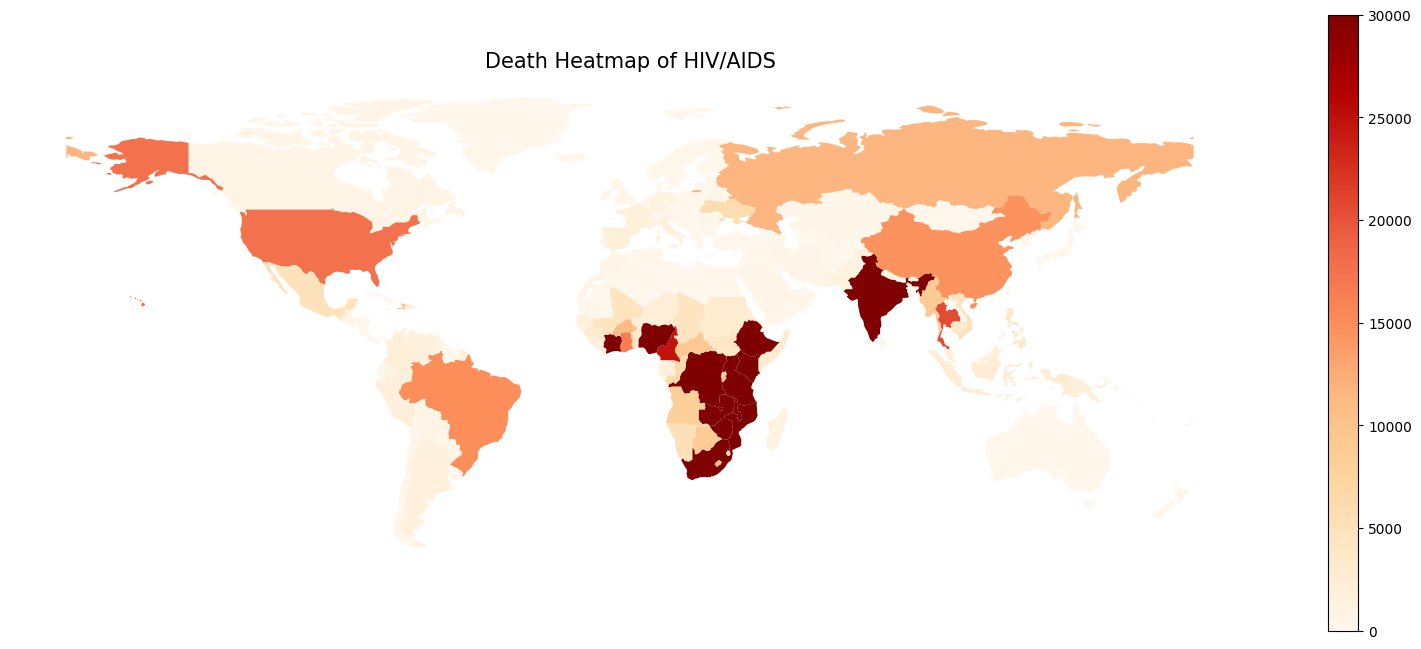

In [11]:
import geopandas


query = """
SELECT A.iso_code, S.country, AVG(S.deaths) FROM reported_hiv_prevelance S
NATURAL JOIN countries A WHERE A.iso_code != ''
group by S.country;
"""

df = pd.read_sql_query(query, cnx)

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# Let
world = world[world.name != "Antarctica"]
world = world.merge(df, left_on='iso_a3', right_on='iso_code')
world.plot(column='AVG(S.deaths)', legend=True, cmap='OrRd',legend_kwds={},missing_kwds={'color':'lightgrey'}, figsize=(20,8), vmin = 0, vmax = 30000 ) 
plt.title("Death Heatmap of HIV/AIDS", fontsize=15)
plt.axis('off')
plt.show()

rusya
kongo
güney afrika
ispanya
amerika
hindistan
türkiye

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\2479724525.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


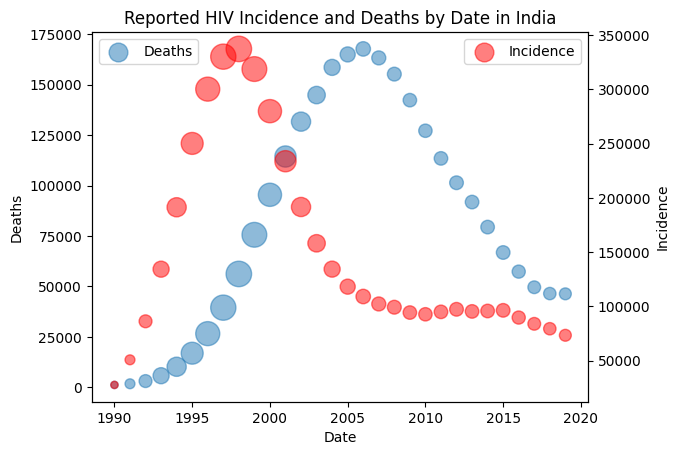

In [16]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'India'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in India")
plt.xlabel("Date")
plt.ylabel("Deaths")

# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")

# add legend
plt.legend(['Incidence'], loc='upper right')


plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\3674896950.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


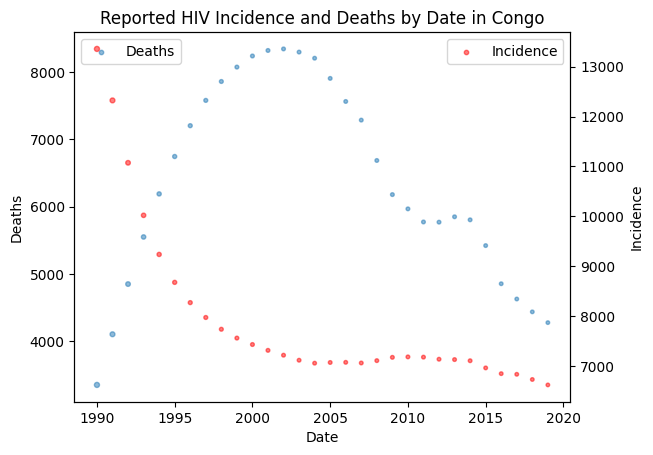

In [17]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'Congo'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in Congo")
plt.xlabel("Date")
plt.ylabel("Deaths")

# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")

# add legend
plt.legend(['Incidence'], loc='upper right')

plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\3751337026.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


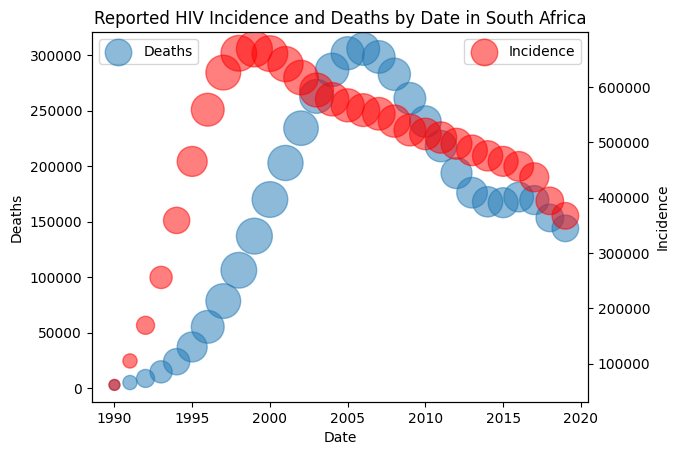

In [18]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'South Africa'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in South Africa")
plt.xlabel("Date")
plt.ylabel("Deaths")

# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")


# add legend
plt.legend(['Incidence'], loc='upper right')


plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\1384374088.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


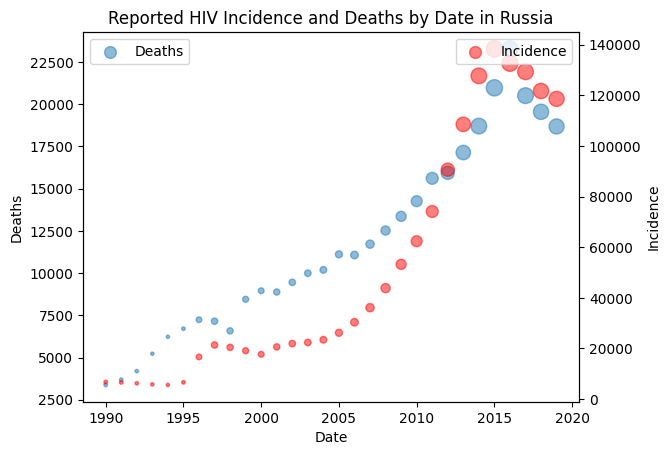

In [19]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'Russia'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in Russia")
plt.xlabel("Date")
plt.ylabel("Deaths")


# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")


# add legend
plt.legend(['Incidence'], loc='upper right')


plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\3731532001.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


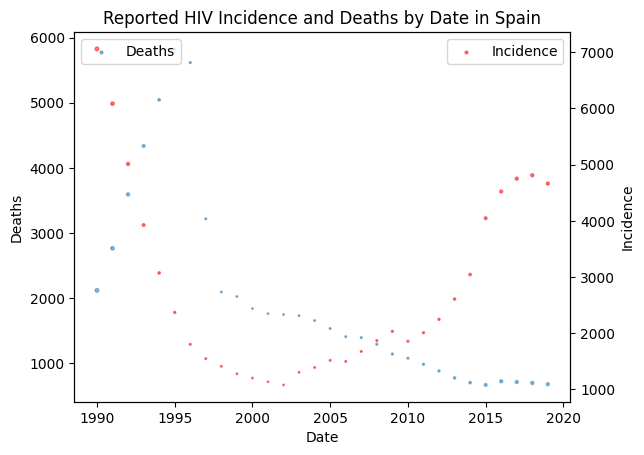

In [20]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'Spain'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in Spain")
plt.xlabel("Date")
plt.ylabel("Deaths")

# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")

# add legend
plt.legend(['Incidence'], loc='upper right')

plt.show()

C:\Users\oyunc\AppData\Local\Temp\ipykernel_13460\2613860403.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, cnx)


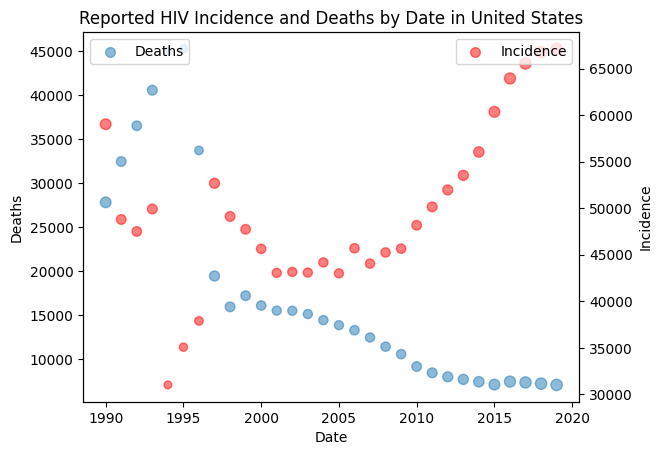

In [21]:
# Let's see the distribution of data using a bubble chart.

query = """
SELECT S.date, CAST(AVG(E.incidence) as decimal(10)) as incidence , CAST(AVG(S.deaths) as decimal(10)) 
As deaths FROM reported_hiv_prevelance S NATURAL JOIN reported_hiv_incidence E WHERE S.country = 'United States'
group by S.date;
"""

df = pd.read_sql_query(query, cnx)

# bubble chart, x = date, y = deaths

plt.scatter(df['date'], df['deaths'], s=df['incidence']*0.001, alpha=0.5)
plt.title("Reported HIV Incidence and Deaths by Date in United States")
plt.xlabel("Date")
plt.ylabel("Deaths")

# add legend
plt.legend(['Deaths'], loc='upper left')

# add y2 = incidence
plt.twinx()
plt.scatter(df['date'], df['incidence'], s=df['incidence']*0.001, alpha=0.5, color='red')
plt.ylabel("Incidence")

# add legend
plt.legend(['Incidence'], loc='upper right')


plt.show()